# JanataHack: NLP Hackathon

Steam is a video game digital distribution service with a vast community of gamers globally. A lot of gamers write reviews at the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the internet and can help them better judge the popularity of games.

Given the review text with user recommendation and other information related to each game for 64 game titles, the task is to predict whether the reviewer recommended the game titles available in the test set on the basis of review text and other information.

About Data Source:
Steam Platform

## Importing Liberary

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importing dataset

In [2]:
## importing train dataset
df1=pd.read_csv('train.csv')
df1.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [3]:
## importing overview dataset which contain info of the game
df2=pd.read_csv('game_overview.csv')
df2.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [4]:
## importing test dataset
df3=pd.read_csv('test.csv')
df3.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


#### checking shape of dataset

In [5]:
print('shape of train dataframe ',df1.shape)
print('shape of game overview dataframe ',df2.shape)
print('shape of test dataframe ',df3.shape)

shape of train dataframe  (17494, 5)
shape of game overview dataframe  (64, 5)
shape of test dataframe  (8045, 4)


### checking count of user suggestion review 

In [6]:
df1['user_suggestion'].value_counts()
## 1 stand for positive review
## 0 stand for negative review

1    9968
0    7526
Name: user_suggestion, dtype: int64

### Merging the game overview in the training datafrme

In [7]:
df1=pd.merge(df1,df2,on='title',how='inner')
df1.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [8]:
### checking dataframes 1st 5 rows
df1.tail()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...
17493,25539,EverQuest II,NaN,"this game since I was a little kid, always hav...",1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...


### Merging the game overview in the testing datafrme

In [9]:
df3=pd.merge(df3,df2,on='title',how='inner')
df3.head()

,review_id,title,year,user_review,developer,publisher,tags,overview
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B...","Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [10]:
### checking dataframes 1st 5 rows
df3.tail()

,review_id,title,year,user_review,developer,publisher,tags,overview
8040,25198,GUNS UP!,2017.0,Early Access ReviewGuns UP!Positive: Good Idea...,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
8041,25199,GUNS UP!,2018.0,"After 170 hrs, my review. DO NOT SPEND ANY MON...","Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
8042,25200,GUNS UP!,2018.0,Pros:-Fun GameplayCons: -Micro %$#*ing transac...,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
8043,25201,GUNS UP!,2018.0,"Actualy saucy, I definetly suggest to players ...","Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
8044,25202,GUNS UP!,NaN,see people that play for 30 minutes and then s...,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."


### Checking shape of the new dataframe

In [11]:
print('shape of train dataframe ',df1.shape)
print('\n')
print('shape of test dataframe ',df3.shape)

shape of train dataframe  (17494, 9)


shape of test dataframe  (8045, 8)


# EDA

##### creating data column for train dataset

In [12]:
df1['data']='train'

##### creating data column and user suggestion column in test dataset

In [13]:
df3['data']='test'
df3['user_suggestion']=np.nan 

### Concating two dataframe

In [14]:
df=pd.concat([df1,df3])  ## concating dataframes for all preporocessing and EDA)

In [15]:
df.head()

,data,developer,overview,publisher,review_id,tags,title,user_review,user_suggestion,year
0,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,1,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1.0,2016.0
1,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,2,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1.0,2016.0
2,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,3,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1.0,2016.0
3,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,4,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1.0,2015.0
4,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,5,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1.0,2015.0


In [16]:
df.shape

(25539, 10)

In [17]:
df.tail()

,data,developer,overview,publisher,review_id,tags,title,user_review,user_suggestion,year
8040,test,"Valkyrie Entertainment, LLC","In a mashup of RTS & Tower Defense, GUNS UP! i...","PlayStation Mobile, Inc.",25198,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",GUNS UP!,Early Access ReviewGuns UP!Positive: Good Idea...,NaN,2017.0
8041,test,"Valkyrie Entertainment, LLC","In a mashup of RTS & Tower Defense, GUNS UP! i...","PlayStation Mobile, Inc.",25199,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",GUNS UP!,"After 170 hrs, my review. DO NOT SPEND ANY MON...",NaN,2018.0
8042,test,"Valkyrie Entertainment, LLC","In a mashup of RTS & Tower Defense, GUNS UP! i...","PlayStation Mobile, Inc.",25200,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",GUNS UP!,Pros:-Fun GameplayCons: -Micro %$#*ing transac...,NaN,2018.0
8043,test,"Valkyrie Entertainment, LLC","In a mashup of RTS & Tower Defense, GUNS UP! i...","PlayStation Mobile, Inc.",25201,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",GUNS UP!,"Actualy saucy, I definetly suggest to players ...",NaN,2018.0
8044,test,"Valkyrie Entertainment, LLC","In a mashup of RTS & Tower Defense, GUNS UP! i...","PlayStation Mobile, Inc.",25202,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",GUNS UP!,see people that play for 30 minutes and then s...,NaN,NaN


#### creating length column 

In [19]:
df['length_review']=df['user_review'].apply(len)
df.head()

,data,developer,overview,publisher,review_id,tags,title,user_review,user_suggestion,year,length_review
0,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,1,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1.0,2016.0,710
1,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,2,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1.0,2016.0,335
2,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,3,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1.0,2016.0,397
3,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,4,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1.0,2015.0,280
4,train,Lag Studios,Can you survive 1000 rooms of cute terror? Or ...,Lag Studios,5,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1.0,2015.0,334


In [20]:
### checking info of datafram dtypes and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25539 entries, 0 to 8044
Data columns (total 11 columns):
data               25539 non-null object
developer          25539 non-null object
overview           25539 non-null object
publisher          25539 non-null object
review_id          25539 non-null int64
tags               25539 non-null object
title              25539 non-null object
user_review        25539 non-null object
user_suggestion    17494 non-null float64
year               25294 non-null float64
length_review      25539 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.3+ MB


In [21]:
df.isna().sum()  ### checking for null values

data                  0
developer             0
overview              0
publisher             0
review_id             0
tags                  0
title                 0
user_review           0
user_suggestion    8045
year                245
length_review         0
dtype: int64

#### 5-point summary

In [22]:

df.describe()

,review_id,user_suggestion,year,length_review
count,25539.000000,17494.000000,25294.000000,25539.000000
mean,12770.000000,0.569795,2016.318336,767.917577
std,7372.618599,0.495119,1.372628,914.162436
min,1.000000,0.000000,2011.000000,6.000000
25%,6385.500000,0.000000,2015.000000,276.000000
50%,12770.000000,1.000000,2016.000000,450.000000
75%,19154.500000,1.000000,2017.000000,857.000000
max,25539.000000,1.000000,2018.000000,8019.000000


In [23]:
##3 checking publisher info 
df['publisher'].value_counts()

Perfect World Entertainment                    1495
Hi-Rez Studios                                 1425
Valve                                          1347
Bethesda Softworks                             1012
Daybreak Game Company                           966
Wizards of the Coast LLC                        893
Freejam                                         842
Dire Wolf Digital                               791
RETO MOTO                                       745
Gaijin Entertainment                            720
Edge Case Games Ltd.                            718
NEOWIZ                                          712
Wargaming Group Limited                         693
IMCGAMES Co.,Ltd.                               635
Trendy Entertainment                            554
Artix Entertainment, LLC                        519
Expansive Worlds, Avalanche Studios             518
Fishing Planet LLC                              498
Playful Corp.                                   492
The Fighter 

In [ ]:
### user review as per thw lenght 

<Figure size 864x288 with 0 Axes>

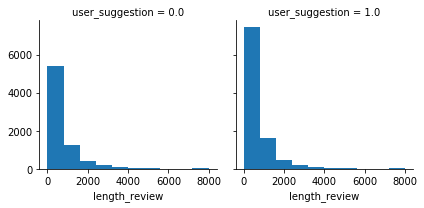

In [24]:
plt.figure(figsize=(12,4))
g = sns.FacetGrid(df,col='user_suggestion')
g.map(plt.hist,'length_review')
plt.show()

### boxplot for the user suggestion and length

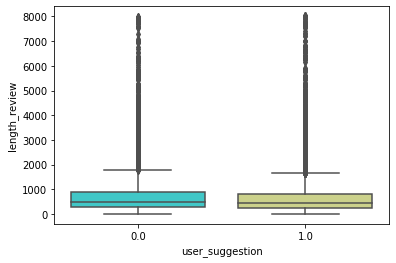

In [25]:
sns.boxplot(x='user_suggestion',y='length_review',data=df,palette='rainbow')
plt.show()

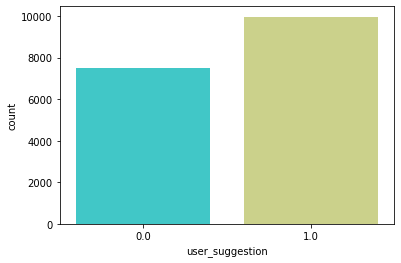

In [26]:
## countplot for user suggestion
sns.countplot(x='user_suggestion',data=df,palette='rainbow')
plt.show()

In [27]:
stars = df.groupby('user_suggestion').mean()
stars

,review_id,year,length_review
user_suggestion,,,
0.0,13863.676854,2016.580966,800.810922
1.0,11335.646669,2016.243754,730.775682


In [28]:
stars.corr()


,review_id,year,length_review
review_id,1.0,1.0,1.0
year,1.0,1.0,1.0
length_review,1.0,1.0,1.0


In [29]:
## checking mode of year
df['year'].mode()

0    2016.0
dtype: float64

In [30]:
df['year']=df['year'].replace(np.nan,2016.0) ### replace null values with mode year

In [31]:
df['year'].value_counts()

2016.0    6973
2018.0    6051
2017.0    6051
2015.0    3774
2014.0    2021
2013.0     460
2012.0     140
2011.0      69
Name: year, dtype: int64

In [32]:
df['year']=df['year'].astype('int')  ### convertibg the dtype to int

### Dividing dataset for modeling

In [34]:
df1=df[df['data']=='train'] ###  divind train into train
df3=df[df['data']=='test']  ###  divind test into test

##### Removing unm=wanted feature from both datset

In [35]:
df1=df1.drop('data',axis=1)
df3=df3.drop(['data','user_suggestion'],axis=1)

# CountVectorizer

In [36]:
## importing CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

## creating vectoriser with english stopwords 
vect = CountVectorizer(stop_words='english')

#### creating X and y for dataset

In [38]:
## for train dataset
X=df1['user_review']
y=df1['user_suggestion']

## for test dataset
X1=df3['user_review']

In [39]:
## using vectorizing fitting X and y
vect.fit(X,y)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
#3# checking vocabaulary from our train dataset

vect.vocabulary_

{'scared': 40524,
 'hearing': 22182,
 'creepy': 11729,
 'voices': 49845,
 'll': 27105,
 'pause': 33322,
 'moment': 29785,
 'write': 51318,
 'review': 38501,
 'wait': 50026,
 'heart': 22186,
 'beat': 6423,
 'return': 38442,
 'atleast': 5288,
 'somewhat': 42808,
 'calmer': 8403,
 'times': 46709,
 'game': 19672,
 'adorable': 3168,
 'like': 26909,
 'happy': 21882,
 'tree': 47420,
 'friends': 19191,
 'graphics': 21004,
 'sceme': 40560,
 'childhood': 9362,
 'bubble': 7931,
 'clean': 9694,
 'hello': 22317,
 '1990': 785,
 'charactes': 9147,
 'isnot': 24931,
 'trying': 47651,
 'kill': 25839,
 'likable': 26908,
 'bit': 6980,
 'odd': 31686,
 'did': 13654,
 'noob': 31164,
 'things': 46318,
 'oh': 31807,
 'look': 27326,
 'class': 9647,
 'room': 39825,
 'ghosts': 20378,
 'dead': 12546,
 'children': 9369,
 'lets': 26726,
 'shine': 41462,
 'flashlight': 18380,
 'stand': 43718,
 'staring': 43765,
 'hmm': 22653,
 'music': 30356,
 'turn': 47757,
 'chasing': 9196,
 'afraid': 3368,
 'finding': 18162,
 'loc

In [41]:
X1=df3['user_review']

### transforming the our X into vectorizing form

In [42]:
X_train_transformed= vect.transform(X)
X_test_transformed= vect.transform(X1)

### MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [43]:
## fitting data for X and y
mnb.fit(X_train_transformed, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#### predicting for test dataset

In [44]:
y_pred_class = mnb.predict(X_test_transformed)
y_pred_proba=mnb.predict_proba(X_test_transformed)

In [45]:
type(y_pred_class)

numpy.ndarray

In [ ]:
## saving in dataframe format

In [46]:
results = pd.DataFrame({'review_id':df3['review_id'], 'user_suggestion':y_pred_class})
results.to_csv("review.csv", index = False)

###### RESULT

* F1 SCORE IS 0.80

### Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [49]:
lr.fit(X_train_transformed, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = lr.predict(X_test_transformed)

In [51]:
y_pred

array([0., 0., 0., ..., 0., 1., 1.])

In [52]:
result = pd.DataFrame({'review_id':df3['review_id'],'user_suggestion':y_pred})
result.to_csv("review1.csv", index = False)

###### RESULT

* F1 SCORE IS 0.799

### DESCISONTREE

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier ( )

In [56]:
dtc.fit(X_train_transformed, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_pred1 = dtc.predict(X_test_transformed)

###### RESULT

* F1 SCORE IS 0.704

## TF-IDF & PIPELINE

In [60]:
### importing TFIDF 
from sklearn.feature_extraction.text import  TfidfTransformer

In [61]:
### importing pipeline for running model in 1 code
from sklearn.pipeline import Pipeline

### MultinomialNB

In [62]:
## creating pipeline for naive bayce model
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [63]:
X=df1['user_review']
y=df1['user_suggestion']
X1=df3['user_review']

In [64]:
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
predictions = pipeline.predict(X1)
predictions

array([1., 0., 0., ..., 1., 1., 1.])

In [66]:
result = pd.DataFrame({'review_id':df3['review_id'],'user_suggestion':predictions})
result.to_csv("review3.csv", index = False)

###### RESULT

* F1 SCORE IS 0.777

### LogisticRegression

In [67]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [68]:
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [69]:
prediction = pipeline.predict(X1)
prediction

array([1., 0., 0., ..., 0., 1., 1.])

In [70]:
result = pd.DataFrame({'review_id':df3['review_id'],'user_suggestion':prediction})
result.to_csv("review4_lr1.csv", index = False)


###### RESULT

* F1 SCORE IS 0.826

### WE GOT BEST RESULT WITH THE TF-IDF USING LOGISTIC REGRESSION MODEL 0.826